# Metropolis sampling

In this notebook we analyse the results from VMC calculations on a spherical harmonic oscillator using brute force Metropolis.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm

from vmc.interface import PyHarmonicOscillator, PyMetropolisAlgorithm, \
    PySimpleGaussian, PySimpleGaussianNumerical

from IPython.core.pylabtools import figsize

In [2]:
sns.set(color_codes=True)
figsize(14, 10)

We use natural units with $m = \hbar = c = 1$. We also restrict our views to $\omega = 1$ in this analysis.

In [5]:
mass = 1.0
omega = 1.0

In [4]:
spread = 1.0
step_length = 0.05

## The one dimensional spherical harmonic oscillator

Starting with the simplest case we look at the one dimensional spherical harmonic oscillator.

\begin{align}
    \Psi_T(\mathbf{x}) &= \prod_{i = 1}^N\exp(-\alpha x_i).
\end{align}

We wish to compare the CPU time of the analytical scheme, i.e., an analytical expression for the Laplcian and hence the local energy, versus a central difference scheme of second order.

We know that the exact ground state energy for the one dimensional spherical harmonic oscillator can be found at $\alpha = 0.5$. By restricting our view to the region $\alpha \in [0.1, 0.7]$ we should observe a trend where the average energy goes towards a minimum at $\alpha = 0.5$ and increases on both sides.

In [50]:
alpha_min = 0.4
alpha_max = 0.6
num_alphas = 5

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)

In [66]:
num_particles = 300
num_dimensions = 1
num_parameters = 1

num_samples = 300 * 12000

In [67]:
solver = PyMetropolisAlgorithm(num_particles)
wavefunction_analytical = PySimpleGaussian(
    num_particles, num_dimensions, num_parameters, mass, omega, spread=spread)
#wavefunction_approximate = PySimpleGaussianNumerical(
#    num_particles, num_dimensions, num_parameters, mass, omega, spread=spread)
hamiltonian = PyHarmonicOscillator(mass, omega)

In [68]:
energies_analytical = np.zeros(num_alphas)
variance_analytical = np.zeros(num_alphas)
#energies_approximate = np.zeros(num_alphas)
#variance_approximate = np.zeros(num_alphas)
num_experiments = 100

for experiment in tqdm.tqdm(range(num_experiments)):
    for i in range(num_alphas):
        wavefunction_analytical.set_parameters(alphas[i])
        #wavefunction_approximate.set_parameters(alphas[i])

        #solver.run(wavefunction_analytical, hamiltonian, step_length, 1e6)

        energy, variance = solver.run_with_variance(
            wavefunction_analytical, hamiltonian, step_length, num_samples)
        #energies_approximate[i], variance_approximate[i] = solver.run_with_variance(
        #    wavefunction_approximate, hamiltonian, step_length, num_samples)

        energies_analytical[i] += energy
        variance_analytical[i] += variance
        wavefunction_analytical.redistribute()
        #wavefunction_approximate.redistribute()

energies_analytical /= (num_samples*num_experiments)
variance_analytical /= num_experiments
#energies_approximate /= num_samples

100%|██████████| 100/100 [18:19<00:00, 10.99s/it]


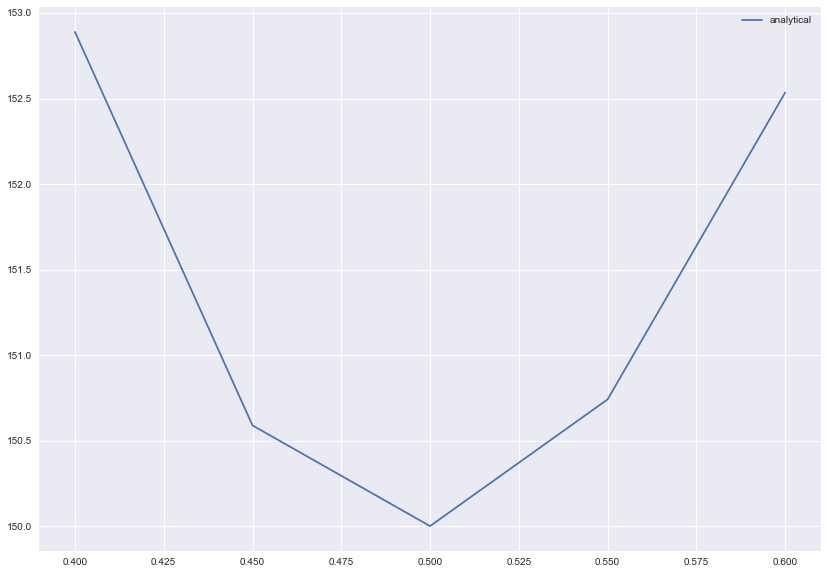

In [69]:
plt.plot(alphas.ravel(), energies_analytical, label="analytical")
#plt.plot(alphas.ravel(), energies_approximate, label="approximate")
plt.legend(loc="best")
plt.show()

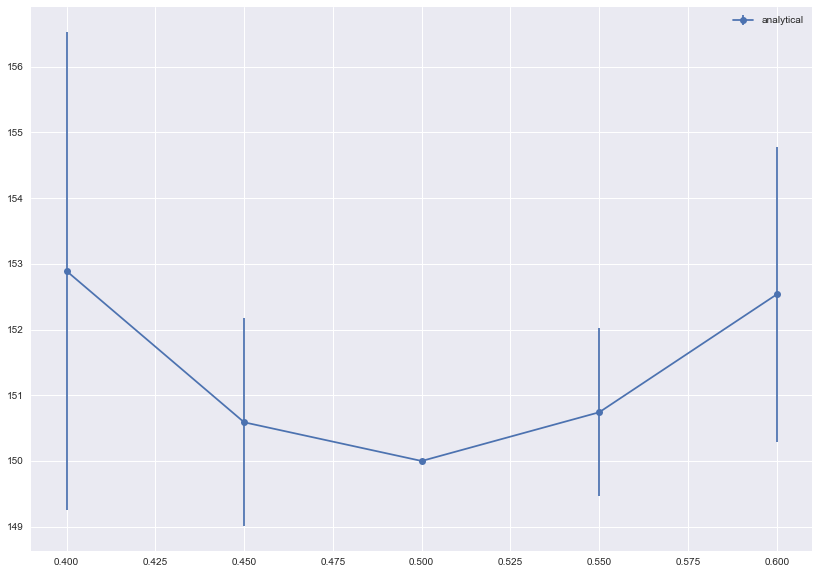

In [70]:
plt.errorbar(
    alphas.ravel(), energies_analytical, yerr=np.sqrt(variance_analytical),
    label="analytical", fmt="o-")
#plt.errorbar(
#    alphas.ravel(), energies_approximate, yerr=np.sqrt(variance_approximate),
#    label="approximate")
plt.legend(loc="best")
plt.show()

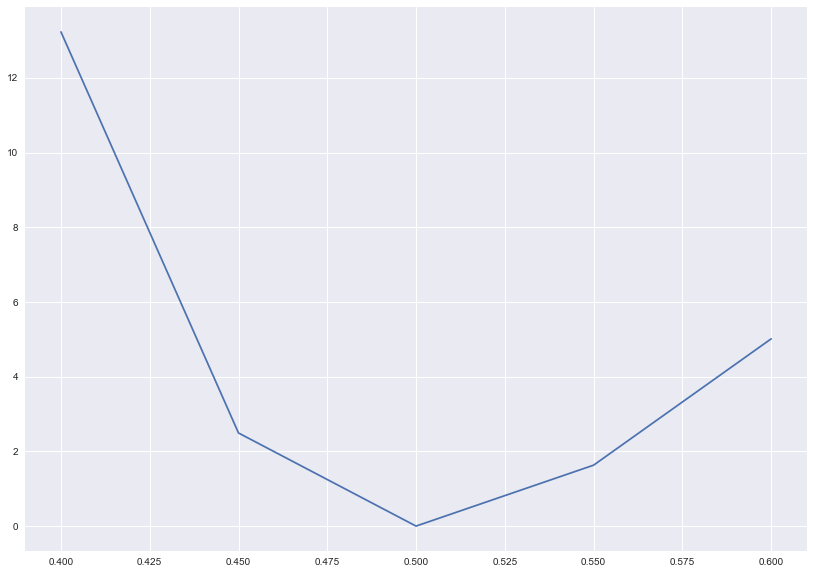

In [71]:
plt.plot(alphas.ravel(), variance_analytical)
plt.show()

In [84]:
print (np.sqrt(variance_analytical/num_particles))
print (variance_analytical/num_particles)
print (alphas.ravel())
print (energies_analytical/num_particles)

[ 0.21001965  0.09116551  0.          0.07374548  0.12927588]
[ 0.04410825  0.00831115  0.          0.0054384   0.01671225]
[ 0.4   0.45  0.5   0.55  0.6 ]
[ 0.50963119  0.50196203  0.5         0.50246945  0.50844862]
